In [1]:
import numpy
import pandas as pd
import os
import csv
import ast
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

from wquantiles import quantile
from openfisca_survey_manager.utils import asof

from openfisca_france_indirect_taxation import FranceIndirectTaxationTaxBenefitSystem
from openfisca_france_indirect_taxation.examples.utils_example import (
    wavg,
    collapse,
    dataframe_by_group,
    graph_builder_bar,
    df_weighted_average_grouped)
from openfisca_france_indirect_taxation.build_survey_data.utils import weighted_sum
from openfisca_france_indirect_taxation.almost_ideal_demand_system.utils import add_niveau_vie_decile
from openfisca_france_indirect_taxation.surveys import SurveyScenario
from openfisca_france_indirect_taxation.calibration import get_inflators_by_year_energy
from openfisca_france_indirect_taxation.utils import assets_directory, get_input_data_frame

In [2]:
from openfisca_france_indirect_taxation.projects.TVA_Herve_IPP.new_calage_bdf_cn import (
    new_get_bdf_aggregates,
    new_get_cn_aggregates,
    new_get_inflators_bdf_to_cn,
    new_get_inflators_cn_to_cn,
    new_get_inflators,
    new_get_inflators_by_year)

In [9]:
data_year = 2017
inflators_by_year = new_get_inflators_by_year(rebuild = False, year_range = range(2017, 2025), data_year = data_year)
simulated_variables = ['tva_taux_plein',
'tva_taux_intermediaire',
 'tva_taux_reduit',
 'tva_taux_super_reduit',
 'tva_total',
 'depenses_tva_exonere',
 'depenses_tva_taux_plein',
 'depenses_tva_taux_intermediaire',
 'depenses_tva_taux_reduit',
 'depenses_tva_taux_super_reduit',
 'rev_disponible',
 'rev_disp_yc_loyerimpute',
 'loyer_impute',
 'depenses_tot',
 'depenses_totales',
 'pondmen'
]

agregates = pd.DataFrame(columns = simulated_variables)
for year in range(2017,2025) :
    inflation_kwargs = dict(inflator_by_variable = inflators_by_year[year])
    survey_scenario = SurveyScenario.create(
        inflation_kwargs = inflation_kwargs,
        year = year,
        data_year = data_year
        )
    df_sum = dataframe_by_group(survey_scenario, category = 'niveau_vie_decile', variables = simulated_variables, aggfunc = 'sum')
    agregates.loc[year] = df_sum.sum()

In [10]:
agregates 

,tva_taux_plein,tva_taux_intermediaire,tva_taux_reduit,tva_taux_super_reduit,tva_total,depenses_tva_exonere,depenses_tva_taux_plein,depenses_tva_taux_intermediaire,depenses_tva_taux_reduit,depenses_tva_taux_super_reduit,rev_disponible,rev_disp_yc_loyerimpute,loyer_impute,depenses_tot,depenses_totales,pondmen
2017,7.917940e+10,1.253245e+10,1.032281e+10,2.916588e+08,1.023263e+11,1.828582e+11,4.750764e+11,1.378569e+11,1.980102e+11,1.418017e+10,1.197964e+12,1.387077e+12,1.891127e+11,1.007982e+12,8.251237e+11,8.445859e+10
2018,8.154325e+10,1.318572e+10,1.051409e+10,2.906346e+08,1.055337e+11,1.907752e+11,4.892595e+11,1.450430e+11,2.016794e+11,1.413038e+10,1.234271e+12,1.426805e+12,1.925339e+11,1.040887e+12,8.501123e+11,8.445859e+10
2019,8.296787e+10,1.390826e+10,1.075753e+10,2.915240e+08,1.079252e+11,1.929483e+11,4.978072e+11,1.529909e+11,2.063489e+11,1.417362e+10,1.278664e+12,1.475381e+12,1.967170e+11,1.064269e+12,8.713206e+11,8.445859e+10
2020,7.719403e+10,1.013262e+10,1.050251e+10,2.828792e+08,9.811204e+10,1.906758e+11,4.631642e+11,1.114589e+11,2.014572e+11,1.375332e+10,1.289747e+12,1.489995e+12,2.002478e+11,9.805093e+11,7.898335e+11,8.445859e+10
2021,8.434053e+10,1.187005e+10,1.071044e+10,2.987876e+08,1.072198e+11,1.999309e+11,5.060432e+11,1.305705e+11,2.054456e+11,1.452677e+10,1.358404e+12,1.562187e+12,2.037834e+11,1.056517e+12,8.565861e+11,8.445859e+10
2022,8.926866e+10,1.622249e+10,1.161936e+10,3.059662e+08,1.174165e+11,2.136061e+11,5.356119e+11,1.784474e+11,2.228804e+11,1.487579e+10,1.434894e+12,1.642992e+12,2.080976e+11,1.165422e+12,9.518155e+11,8.445859e+10
2023,9.337144e+10,1.782790e+10,1.269959e+10,3.112216e+08,1.242102e+11,2.546692e+11,5.602286e+11,1.961069e+11,2.436013e+11,1.513130e+10,1.560302e+12,1.773999e+12,2.136968e+11,1.269737e+12,1.015068e+12,8.445859e+10
2024,9.605894e+10,1.834104e+10,1.306513e+10,3.201795e+08,1.277853e+11,2.619993e+11,5.763536e+11,2.017515e+11,2.506128e+11,1.556682e+10,1.605212e+12,1.825060e+12,2.198476e+11,1.306284e+12,1.044285e+12,8.445859e+10


In [4]:
agregates

,tva_taux_plein,tva_taux_intermediaire,tva_taux_reduit,tva_taux_super_reduit,tva_total,depenses_tva_exonere,depenses_tva_taux_plein,depenses_tva_taux_intermediaire,depenses_tva_taux_reduit,depenses_tva_taux_super_reduit,rev_disponible,rev_disp_yc_loyerimpute,loyer_impute,depenses_tot,depenses_totales,pondmen
2017,7.580048e+10,1.253245e+10,1.032281e+10,2.916588e+08,9.894739e+10,2.031317e+11,4.548029e+11,1.378569e+11,1.980102e+11,1.418017e+10,1.197964e+12,1.387077e+12,1.891127e+11,1.007982e+12,8.048502e+11,8.445859e+10
2018,7.794378e+10,1.318572e+10,1.051409e+10,2.906346e+08,1.019342e+11,2.123720e+11,4.676627e+11,1.450430e+11,2.016794e+11,1.413038e+10,1.234271e+12,1.426805e+12,1.925339e+11,1.040887e+12,8.285154e+11,8.445859e+10
2019,7.923649e+10,1.390826e+10,1.075753e+10,2.915240e+08,1.041938e+11,2.153366e+11,4.754190e+11,1.529909e+11,2.063489e+11,1.417362e+10,1.278664e+12,1.475381e+12,1.967170e+11,1.064269e+12,8.489324e+11,8.445859e+10
2020,7.296621e+10,1.013262e+10,1.050251e+10,2.828792e+08,9.388422e+10,2.160427e+11,4.377973e+11,1.114589e+11,2.014572e+11,1.375332e+10,1.289747e+12,1.489995e+12,2.002478e+11,9.805093e+11,7.644666e+11,8.445859e+10
2021,8.011842e+10,1.187005e+10,1.071044e+10,2.987876e+08,1.029977e+11,2.252636e+11,4.807105e+11,1.305705e+11,2.054456e+11,1.452677e+10,1.358404e+12,1.562187e+12,2.037834e+11,1.056517e+12,8.312535e+11,8.445859e+10
2022,8.528796e+10,1.622249e+10,1.161936e+10,3.059662e+08,1.134358e+11,2.374903e+11,5.117278e+11,1.784474e+11,2.228804e+11,1.487579e+10,1.434894e+12,1.642992e+12,2.080976e+11,1.165422e+12,9.279314e+11,8.445859e+10
2023,8.933674e+10,1.782790e+10,1.269959e+10,3.112216e+08,1.201755e+11,2.788774e+11,5.360204e+11,1.961069e+11,2.436013e+11,1.513130e+10,1.560302e+12,1.773999e+12,2.136968e+11,1.269737e+12,9.908600e+11,8.445859e+10
2024,9.190811e+10,1.834104e+10,1.306513e+10,3.201795e+08,1.236345e+11,2.869043e+11,5.514487e+11,2.017515e+11,2.506128e+11,1.556682e+10,1.605212e+12,1.825060e+12,2.198476e+11,1.306284e+12,1.019380e+12,8.445859e+10


In [75]:
agregates

,tva_taux_plein,tva_taux_intermediaire,tva_taux_reduit,tva_taux_super_reduit,tva_total,depenses_tva_exonere,depenses_tva_taux_plein,depenses_tva_taux_intermediaire,depenses_tva_taux_reduit,depenses_tva_taux_super_reduit,rev_disponible,rev_disp_yc_loyerimpute,loyer_impute,depenses_tot,depenses_totales,pondmen
2017,7.580048e+10,1.580871e+10,8.444002e+09,2.916588e+08,1.003448e+11,2.031317e+11,4.548029e+11,1.738958e+11,1.619713e+11,1.418017e+10,1.197964e+12,1.387077e+12,1.891127e+11,1.007982e+12,8.048502e+11,8.445859e+10
2018,7.794378e+10,1.658461e+10,8.564967e+09,2.906346e+08,1.033840e+11,2.123720e+11,4.676627e+11,1.824308e+11,1.642916e+11,1.413038e+10,1.234271e+12,1.426805e+12,1.925339e+11,1.040887e+12,8.285154e+11,8.445859e+10
2019,7.923649e+10,1.740139e+10,8.754359e+09,2.915240e+08,1.056838e+11,2.153366e+11,4.754190e+11,1.914153e+11,1.679245e+11,1.417362e+10,1.278664e+12,1.475381e+12,1.967170e+11,1.064269e+12,8.489324e+11,8.445859e+10
2020,7.296621e+10,1.261960e+10,9.076327e+09,2.828792e+08,9.494501e+10,2.160427e+11,4.377973e+11,1.388156e+11,1.741004e+11,1.375332e+10,1.289747e+12,1.489995e+12,2.002478e+11,9.805093e+11,7.644666e+11,8.445859e+10
2021,8.011842e+10,1.453913e+10,9.179826e+09,2.987876e+08,1.041362e+11,2.252636e+11,4.807105e+11,1.599304e+11,1.760858e+11,1.452677e+10,1.358404e+12,1.562187e+12,2.037834e+11,1.056517e+12,8.312535e+11,8.445859e+10
2022,8.528796e+10,1.968245e+10,9.635207e+09,3.059662e+08,1.149116e+11,2.374903e+11,5.117278e+11,2.165070e+11,1.848208e+11,1.487579e+10,1.434894e+12,1.642992e+12,2.080976e+11,1.165422e+12,9.279314e+11,8.445859e+10
2023,8.933674e+10,2.177479e+10,1.043621e+10,3.112216e+08,1.218590e+11,2.788774e+11,5.360204e+11,2.395227e+11,2.001856e+11,1.513130e+10,1.560302e+12,1.773999e+12,2.136968e+11,1.269737e+12,9.908600e+11,8.445859e+10
2024,9.190811e+10,2.240153e+10,1.073660e+10,3.201795e+08,1.253664e+11,2.869043e+11,5.514487e+11,2.464168e+11,2.059475e+11,1.556682e+10,1.605212e+12,1.825060e+12,2.198476e+11,1.306284e+12,1.019380e+12,8.445859e+10


In [ ]:
agregates (old)

,tva_taux_plein,tva_taux_intermediaire,tva_taux_reduit,tva_taux_super_reduit,tva_total,depenses_tva_exonere,depenses_tva_taux_plein,depenses_tva_taux_intermediaire,depenses_tva_taux_reduit,depenses_tva_taux_super_reduit,rev_disponible,rev_disp_yc_loyerimpute,loyer_impute,depenses_tot,depenses_totales,pondmen
2017,7.845328e+10,1.441827e+10,7.862741e+09,2.916588e+08,1.010260e+11,2.136593e+11,4.707197e+11,1.586010e+11,1.508217e+11,1.418017e+10,1.197964e+12,1.387077e+12,1.891127e+11,1.007982e+12,7.943225e+11,8.445859e+10
2018,8.068022e+10,1.514731e+10,7.973502e+09,2.906346e+08,1.040917e+11,2.231091e+11,4.840814e+11,1.666204e+11,1.529463e+11,1.413038e+10,1.234271e+12,1.426805e+12,1.925339e+11,1.040887e+12,8.177784e+11,8.445859e+10
2019,8.205242e+10,1.592258e+10,8.136745e+09,2.915240e+08,1.064033e+11,2.265549e+11,4.923145e+11,1.751484e+11,1.560776e+11,1.417362e+10,1.278664e+12,1.475381e+12,1.967170e+11,1.064269e+12,8.377141e+11,8.445859e+10
2020,7.561451e+10,1.126653e+10,8.580251e+09,2.828792e+08,9.574417e+10,2.245522e+11,4.536871e+11,1.239319e+11,1.645848e+11,1.375332e+10,1.289747e+12,1.489995e+12,2.002478e+11,9.805093e+11,7.559571e+11,8.445859e+10
2021,8.325562e+10,1.295723e+10,8.638843e+09,2.987876e+08,1.051505e+11,2.342183e+11,4.995337e+11,1.425295e+11,1.657087e+11,1.452677e+10,1.358404e+12,1.562187e+12,2.037834e+11,1.056517e+12,8.222988e+11,8.445859e+10
2022,8.861955e+10,1.796930e+10,9.029455e+09,3.059662e+08,1.159243e+11,2.479648e+11,5.317173e+11,1.976623e+11,1.732013e+11,1.487579e+10,1.434894e+12,1.642992e+12,2.080976e+11,1.165422e+12,9.174568e+11,8.445859e+10
2023,9.282289e+10,1.996829e+10,9.769284e+09,3.112216e+08,1.228717e+11,2.906248e+11,5.569374e+11,2.196512e+11,1.873926e+11,1.513130e+10,1.560302e+12,1.773999e+12,2.136968e+11,1.269737e+12,9.791125e+11,8.445859e+10
2024,9.549461e+10,2.054304e+10,1.005047e+10,3.201795e+08,1.264083e+11,2.989898e+11,5.729677e+11,2.259734e+11,1.927863e+11,1.556682e+10,1.605212e+12,1.825060e+12,2.198476e+11,1.306284e+12,1.007294e+12,8.445859e+10


In [95]:
agregates[['depenses_tva_taux_plein', 'depenses_tva_taux_intermediaire' , 'depenses_tva_taux_reduit','depenses_tva_taux_super_reduit','depenses_tva_exonere']]

,depenses_tva_taux_plein,depenses_tva_taux_intermediaire,depenses_tva_taux_reduit,depenses_tva_taux_super_reduit,depenses_tva_exonere
2017,4.769247e+11,1.517740e+11,1.619713e+11,1.418017e+10,2.031317e+11
2018,4.904657e+11,1.596277e+11,1.642916e+11,1.413038e+10,2.123720e+11
2019,4.990173e+11,1.678169e+11,1.679245e+11,1.417362e+10,2.153366e+11
2020,4.603267e+11,1.162862e+11,1.741004e+11,1.375332e+10,2.160427e+11
2021,5.070398e+11,1.336012e+11,1.760858e+11,1.452677e+10,2.252636e+11
2022,5.399701e+11,1.882647e+11,1.848208e+11,1.487579e+10,2.374903e+11
2023,5.658581e+11,2.096850e+11,2.001856e+11,1.513130e+10,2.788774e+11
2024,5.821452e+11,2.157203e+11,2.059475e+11,1.556682e+10,2.869043e+11


In [15]:
agregates[['depenses_tva_taux_plein', 'depenses_tva_taux_intermediaire' , 'depenses_tva_taux_reduit','depenses_tva_taux_super_reduit','depenses_tva_exonere']]

,depenses_tva_taux_plein,depenses_tva_taux_intermediaire,depenses_tva_taux_reduit,depenses_tva_taux_super_reduit,depenses_tva_exonere
2017,4.707197e+11,1.586010e+11,1.508217e+11,1.418017e+10,4.027720e+11
2018,4.840814e+11,1.666204e+11,1.529463e+11,1.413038e+10,4.156430e+11
2019,4.923145e+11,1.751484e+11,1.560776e+11,1.417362e+10,4.232719e+11
2020,4.536871e+11,1.239319e+11,1.645848e+11,1.375332e+10,4.248000e+11
2021,4.995337e+11,1.425295e+11,1.657087e+11,1.452677e+10,4.380017e+11
2022,5.317173e+11,1.976623e+11,1.732013e+11,1.487579e+10,4.560624e+11
2023,5.569374e+11,2.196512e+11,1.873926e+11,1.513130e+10,5.043216e+11


In [16]:
tva_cpo = pd.DataFrame(data = {'' : [2015,2016,2017,2018,2019,2020,2021] , 'tva (CPO)' : [152.6, 155.4, 162.9, 168.6, 174.9, 162.6, 185.9]})
tva_cpo.set_index('', inplace= True)

In [17]:
tva_cpo.loc[:,'tva (CPO)'] = tva_cpo.loc[:,'tva (CPO)'] * 1e9

In [18]:
compare_agregate = tva_cpo.merge(agregates['tva_total'], left_index = True, right_index = True)
compare_agregate.rename(columns={'tva_total' : 'tva (BdF)'}, inplace = True)
compare_agregate.loc[:,'ratio'] = compare_agregate.loc[:,'tva (BdF)'] / compare_agregate.loc[:,'tva (CPO)'] * 100 

In [19]:
compare_agregate

,tva (CPO),tva (BdF),ratio
2017,1.629000e+11,1.023263e+11,62.815414
2018,1.686000e+11,1.055337e+11,62.594128
2019,1.749000e+11,1.079252e+11,61.706794
2020,1.626000e+11,9.811204e+10,60.339510
2021,1.859000e+11,1.072198e+11,57.676064


## Le revenu disponible et les niveaux de vie

In [52]:
data_year = 2017 
survey_scenario_test = SurveyScenario.create(
    year = 2017,
    data_year = data_year
    )
test_revenus_2017= dataframe_by_group(survey_scenario_test, category = 'niveau_vie_decile', variables = simulated_variables, aggfunc = 'mean')

In [53]:
test_table_micro_2017 = survey_scenario_test.create_data_frame_by_entity(simulated_variables+['situapr'], period = 2017) 
test_menages_2017 = test_table_micro_2017['menage']

In [54]:
test_menages_2017

,poste_04_5_4_1,poste_04_4_3_1,poste_04_3_1_1,poste_04_5_5_1,tva_taux_reduit,depenses_tva_taux_super_reduit,poste_agrege_02,depenses_tot,poste_04_4_2_1,depenses_tva_taux_reduit,...,poste_agrege_10,poste_04_5_0_0,poste_agrege_05,poste_agrege_13,tva_taux_intermediaire,poste_04_5_5_2,tva_taux_plein,poste_agrege_07,poste_04_5_1_1,poste_04_6_1_1
0,200.0,0.0,0.0,0.0,337.375732,232.800003,486.720001,16158.260742,0.0,6471.479980,...,0.0,0.0,331.080017,457.000000,12.454545,0.0,939.496582,1685.479980,337.0,0.0
1,0.0,0.0,0.0,0.0,312.337433,1550.199951,4383.600098,49363.480469,0.0,5991.199219,...,0.0,0.0,4045.000000,1672.280029,645.818176,0.0,4469.680176,17259.000000,636.0,0.0
2,0.0,0.0,0.0,0.0,342.332520,0.000000,286.000000,34189.597656,0.0,6566.559570,...,0.0,0.0,3552.000000,355.679993,368.090912,0.0,3812.840332,20000.000000,729.0,0.0
3,0.0,0.0,0.0,0.0,90.833939,0.000000,468.000000,5462.439941,0.0,1742.359985,...,0.0,0.0,39.000000,249.279999,67.225456,0.0,274.933319,0.000000,720.0,0.0
4,0.0,0.0,0.0,0.0,889.425598,618.000000,1232.400024,36521.417969,0.0,17060.798828,...,0.0,0.0,20.000000,4691.799805,75.803642,0.0,2271.963379,6237.000000,862.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12076,0.0,0.0,0.0,0.0,72.652138,0.000000,2366.000000,18534.121094,0.0,1393.600098,...,0.0,0.0,0.000000,0.000000,501.563690,0.0,511.219971,0.000000,2000.0,0.0
12077,0.0,0.0,0.0,0.0,853.844116,1380.000000,0.000000,114960.046875,0.0,16378.282227,...,1300.0,0.0,14311.439453,2671.520020,1477.051025,0.0,12296.698242,54485.000000,700.0,0.0
12078,0.0,0.0,0.0,0.0,67.584831,186.000000,0.000000,16671.859375,0.0,1296.399902,...,1950.0,0.0,1269.000000,495.000000,136.618195,0.0,1303.443237,360.000000,695.0,0.0
12079,0.0,0.0,0.0,0.0,572.112549,24.000000,0.000000,26864.777344,0.0,10974.159180,...,0.0,0.0,21.320000,694.679993,195.181808,0.0,1277.336670,2179.040039,820.0,0.0


In [163]:
mean_by_rev_decile = df_weighted_average_grouped(dataframe = test_menages_2017[test_menages_2017['situapr'] != 3], groupe = 'decile_rev_disponible', varlist = simulated_variables + ['situapr'])

In [164]:
mean_by_rev_decile['rev_disponible']

decile_rev_disponible
1     10033.130723
2     15273.706832
3     19137.838248
4     22856.047215
5     27059.931346
6     31978.798300
7     37481.830879
8     44309.849606
9     53473.676828
10    84027.880214
Name: rev_disponible, dtype: float64

In [5]:
data_year = 2017
inflators_by_year = new_get_inflators_by_year(rebuild = False, year_range = range(2017, 2025), data_year = data_year)
simulated_variables = ['rev_disponible',
 'rev_disp_yc_loyerimpute',
 'loyer_impute',
 'niveau_de_vie',
 'ocde10',
 'depenses_tot',
 'depenses_totales',
 'pondmen',
]

inflation_kwargs = dict(inflator_by_variable = inflators_by_year[2018])
survey_scenario = SurveyScenario.create(
    inflation_kwargs = inflation_kwargs,
    year = 2018,
    data_year = data_year
    )
revenus_mean_2018 = dataframe_by_group(survey_scenario, category = 'niveau_vie_decile', variables = simulated_variables, aggfunc = 'mean')

In [21]:
revenus_mean_2018

,rev_disponible,rev_disp_yc_loyerimpute,loyer_impute,niveau_de_vie,ocde10,depenses_tot,depenses_totales,pondmen
niveau_vie_decile,,,,,,,,
1.0,15041.670428,18536.660355,3632.937147,9714.736426,1.505482,22099.307421,16088.827166,1.0
2.0,23506.066256,27219.807778,3719.387471,15289.942116,1.539022,24670.345784,18473.836473,1.0
3.0,27594.978323,31998.140183,4415.003312,18437.628800,1.495870,26585.642253,19660.943243,1.0
4.0,32223.904223,37562.447981,5376.003594,21276.547155,1.515424,30198.695606,22538.817979,1.0
5.0,35947.667202,41773.157343,5851.669616,23897.229821,1.504028,32646.835122,24993.122354,1.0
6.0,40597.777514,47262.755976,6704.862703,26660.633355,1.522874,37198.963601,29072.977012,1.0
7.0,46436.936627,53814.823807,7393.998517,29753.419533,1.561009,38738.099003,30386.016600,1.0
8.0,52750.525082,61048.592109,8306.410044,33848.909800,1.558936,44163.893889,35741.018207,1.0
9.0,62655.749144,72314.424510,9644.858803,40073.036461,1.564487,47112.961284,38464.560895,1.0


In [22]:
data_year = 2017
inflators_by_year = new_get_inflators_by_year(rebuild = False, year_range = range(2017, 2025), data_year = data_year)
simulated_variables = ['rev_disponible',
 'rev_disp_yc_loyerimpute',
 'loyer_impute',
 'niveau_de_vie',
 'ocde10',
 'depenses_tot',
 'depenses_totales',
 'pondmen'
]

inflation_kwargs = dict(inflator_by_variable = inflators_by_year[2018])
survey_scenario = SurveyScenario.create(
    inflation_kwargs = inflation_kwargs,
    year = 2018,
    data_year = data_year
    )
revenus_mean_2018_by_rev_decile = dataframe_by_group(survey_scenario, category = 'decile_rev_disponible', variables = simulated_variables, aggfunc = 'mean')

In [23]:
revenus_mean_2018_by_rev_decile

,rev_disponible,rev_disp_yc_loyerimpute,loyer_impute,niveau_de_vie,ocde10,depenses_tot,depenses_totales,pondmen
decile_rev_disponible,,,,,,,,
1.0,11944.401586,15042.466632,3246.367145,10869.768299,1.110917,18053.312132,12711.486621,1.0
2.0,19117.531415,22470.840079,3397.882755,17274.962335,1.164003,20002.008871,14198.154080,1.0
3.0,23962.092481,27925.397362,3990.379483,21024.704420,1.205091,22456.507801,16163.709543,1.0
4.0,28615.130123,33572.464616,5016.619059,22993.612721,1.350724,26566.070160,19946.018822,1.0
5.0,33868.564354,39641.709568,5831.988255,24988.542020,1.477162,32240.807718,24691.531392,1.0
6.0,40030.734783,46557.044494,6560.163233,27228.797496,1.591578,36893.351064,28886.967732,1.0
7.0,46923.225209,54298.538753,7382.005670,29413.567715,1.722166,40075.024431,31659.207936,1.0
8.0,55473.455328,63871.329109,8367.191966,32667.675345,1.809757,43740.489127,34784.014964,1.0
9.0,66943.999751,76972.847431,9979.151314,37615.207938,1.898974,54401.498830,44990.808077,1.0


In [24]:
table_micro = survey_scenario.create_data_frame_by_entity(
    ['rev_disponible',
 'rev_disp_yc_loyerimpute',
 'loyer_impute',
 'niveau_de_vie',
 'niveau_vie_decile',
 'decile_rev_disponible',
 'ocde10',
 'depenses_tot',
 'depenses_totales',
 'pondmen',
 'situapr'
], 
    period = 2018) 
menages = table_micro['menage']

Y a-t-il des ménages dont le responsable est étudiant ? (situapr == 3)

In [25]:
len(menages[menages['situapr'] == 3])

155

Y a-t-il des ménages dont le revenu disponible est négatif ?

In [26]:
len(menages[menages['rev_disponible'] < 0])

0

In [27]:
from openfisca_france_indirect_taxation.examples.utils_example import df_weighted_average_grouped

### Revenu disponible par décile

In [28]:
mean_by_rev_decile = df_weighted_average_grouped(dataframe =  menages[menages['situapr'] != 3], groupe = 'decile_rev_disponible', varlist = simulated_variables)
mean_by_rev_decile

,rev_disponible,rev_disp_yc_loyerimpute,loyer_impute,niveau_de_vie,ocde10,depenses_tot,depenses_totales,pondmen
decile_rev_disponible,,,,,,,,
1,12560.533329,16061.795665,3686.444709,11370.297201,1.115920,17824.103260,12706.023575,3267.374301
2,19121.240294,22496.640700,3422.558174,17277.793512,1.164250,19867.047620,14107.400184,3435.593055
3,23958.768360,27965.713739,4039.323360,21010.080229,1.206099,22354.334904,16123.007347,3152.556469
4,28613.615324,33587.186062,5034.833613,22989.354018,1.350951,26588.272672,19967.232406,3072.621848
5,33876.481762,39684.799959,5871.237103,24973.946401,1.478361,32270.408356,24720.704471,2911.774035
6,40034.439226,46578.493095,6579.969017,27229.484736,1.591450,36938.752260,28927.258967,2819.474450
7,46923.716934,54293.860456,7376.205530,29430.415240,1.720890,40101.702356,31682.313387,2707.920285
8,55471.752452,63871.228567,8369.018641,32671.917791,1.809453,43741.226291,34781.224065,2776.187860
9,66943.999751,76972.847431,9979.151314,37615.207938,1.898974,54401.498830,44990.808077,2735.426580


In [16]:
revenus_mean_2018_by_rev_decile

,rev_disponible,rev_disp_yc_loyerimpute,loyer_impute,niveau_de_vie,ocde10,depenses_tot,depenses_totales,pondmen
decile_rev_disponible,,,,,,,,
1.0,11944.401586,15042.466632,3246.367145,10869.768299,1.110917,18053.312132,12711.486621,1.0
2.0,19117.531415,22470.840079,3397.882755,17274.962335,1.164003,20002.008871,14198.154080,1.0
3.0,23962.092481,27925.397362,3990.379483,21024.704420,1.205091,22456.507801,16163.709543,1.0
4.0,28615.130123,33572.464616,5016.619059,22993.612721,1.350724,26566.070160,19946.018822,1.0
5.0,33868.564354,39641.709568,5831.988255,24988.542020,1.477162,32240.807718,24691.531392,1.0
6.0,40030.734783,46557.044494,6560.163233,27228.797496,1.591578,36893.351064,28886.967732,1.0
7.0,46923.225209,54298.538753,7382.005670,29413.567715,1.722166,40075.024431,31659.207936,1.0
8.0,55473.455328,63871.329109,8367.191966,32667.675345,1.809757,43740.489127,34784.014964,1.0
9.0,66943.999751,76972.847431,9979.151314,37615.207938,1.898974,54401.498830,44990.808077,1.0


### Niveaux de vie par décile

In [17]:
df_weighted_average_grouped(dataframe= menages, groupe = 'niveau_vie_decile', varlist = simulated_variables)

,rev_disponible,rev_disp_yc_loyerimpute,loyer_impute,niveau_de_vie,ocde10,depenses_tot,depenses_totales,pondmen
niveau_vie_decile,,,,,,,,
1.0,16123.448128,20004.470015,4045.064415,10136.415963,1.560995,22365.509821,16511.476170,3184.870667
2.0,23681.648535,27488.166205,3820.016412,15293.771997,1.550529,24745.841970,18555.597297,2955.399810
3.0,27553.278553,31970.795443,4431.863551,18436.330006,1.493760,26577.505450,19657.711763,2962.669310
4.0,32276.302004,37648.049156,5412.213014,21274.588769,1.518029,30182.708529,22546.039657,2970.234185
5.0,36006.927194,41859.225354,5880.587026,23896.939723,1.506519,32657.726338,25020.601887,2910.193390
6.0,40633.286856,47313.081016,6720.792490,26663.030052,1.524116,37203.152343,29088.037165,2864.717574
7.0,46470.066239,53854.794490,7401.040529,29752.694391,1.562153,38798.393457,30433.109982,3001.981657
8.0,52822.350720,61149.351595,8337.473188,33853.767190,1.560901,44255.286983,35814.437801,2979.137729
9.0,62692.111115,72363.656590,9658.593371,40077.239971,1.565291,47158.334040,38506.532089,2830.490208


In [18]:
revenus_mean_2018

,rev_disponible,rev_disp_yc_loyerimpute,loyer_impute,niveau_de_vie,ocde10,depenses_tot,depenses_totales,pondmen
niveau_vie_decile,,,,,,,,
1.0,15041.670428,18536.660355,3632.937147,9714.736426,1.505482,22099.307421,16088.827166,1.0
2.0,23506.066256,27219.807778,3719.387471,15289.942116,1.539022,24670.345784,18473.836473,1.0
3.0,27594.978323,31998.140183,4415.003312,18437.628800,1.495870,26585.642253,19660.943243,1.0
4.0,32223.904223,37562.447981,5376.003594,21276.547155,1.515424,30198.695606,22538.817979,1.0
5.0,35947.667202,41773.157343,5851.669616,23897.229821,1.504028,32646.835122,24993.122354,1.0
6.0,40597.777514,47262.755976,6704.862703,26660.633355,1.522874,37198.963601,29072.977012,1.0
7.0,46436.936627,53814.823807,7393.998517,29753.419533,1.561009,38738.099003,30386.016600,1.0
8.0,52750.525082,61048.592109,8306.410044,33848.909800,1.558936,44163.893889,35741.018207,1.0
9.0,62655.749144,72314.424510,9644.858803,40073.036461,1.564487,47112.961284,38464.560895,1.0


## Structure de la consommation par type de taux de TVA, par décile de niveau de vie

In [21]:
simulated_variables = ['depenses_tva_taux_plein',
'depenses_tva_taux_intermediaire',
'depenses_tva_taux_reduit',
'depenses_tva_taux_super_reduit',
'depenses_tva_exonere',
'depenses_totales',
'loyer_impute',
'tva_taux_plein',
 'tva_taux_intermediaire',
 'tva_taux_reduit',
 'tva_taux_super_reduit',
 'tva_total',
 'niveau_de_vie',
 'rev_disponible',
 'decile_rev_disponible',
 'rev_disp_yc_loyerimpute',
 'depenses_tot',
 'pondmen'] + ["poste_agrege_0{}".format(i) for i in range(1, 10)] + ["poste_agrege_{}".format(i) for i in range(10, 14)] + ['poste_04_1_1_1',
 'poste_04_1_2_1',
 'poste_04_3_1_1',
 'poste_04_3_2_1',
 'poste_04_4_1_1',
 'poste_04_4_2_1',
 'poste_04_4_3_1',
 'poste_04_4_4_1',
 'poste_04_5_0_0',
 'poste_04_5_1_1',
 'poste_04_5_2_1',
 'poste_04_5_2_2',
 'poste_04_5_3_1',
 'poste_04_5_4_1',
 'poste_04_5_5_1',
 'poste_04_5_5_2',
 'poste_04_6_1_1']

In [22]:
inflators_by_year = new_get_inflators_by_year(rebuild = False, year_range = range(2017, 2025), data_year = data_year)
inflation_kwargs = dict(inflator_by_variable = inflators_by_year[2017])
survey_scenario = SurveyScenario.create(
    inflation_kwargs = inflation_kwargs,
    year = 2017,
    data_year = data_year
    )
to_graph = dataframe_by_group(survey_scenario, category = 'niveau_vie_decile', variables = simulated_variables, aggfunc = 'mean')
to_graph['poste_agrege_12'] += to_graph['poste_agrege_13']
to_graph.drop('poste_agrege_13', axis = 1, inplace = True)

table_micro_2017 = survey_scenario.create_data_frame_by_entity(simulated_variables, period = 2017) 
menages_2017 = table_micro_2017['menage']

### La non-réponse dans l'enquête Budget de famille (2017)

In [33]:
len(menages_2017)

12081

In [43]:
liste_postes_agreges = ["poste_agrege_0{}".format(i) for i in range(1, 10)] + ["poste_agrege_{}".format(i) for i in range(10, 13)]

In [13]:
{ key : dict((menages_2017== 0).sum())[key] for key in liste_postes_agreges}

{'poste_agrege_01': 592,
 'poste_agrege_02': 6012,
 'poste_agrege_03': 1889,
 'poste_agrege_04': 63,
 'poste_agrege_05': 1768,
 'poste_agrege_06': 1846,
 'poste_agrege_07': 2004,
 'poste_agrege_08': 147,
 'poste_agrege_09': 251,
 'poste_agrege_10': 10496,
 'poste_agrege_11': 3938,
 'poste_agrege_12': 18}

In [45]:
menages_2017.loc[menages_2017['depenses_tot'] > menages_2017['rev_disponible'], ['depenses_tot','rev_disponible'] + liste_postes_agreges ]

,depenses_tot,rev_disponible,poste_agrege_01,poste_agrege_02,poste_agrege_03,poste_agrege_04,poste_agrege_05,poste_agrege_06,poste_agrege_07,poste_agrege_08,poste_agrege_09,poste_agrege_10,poste_agrege_11,poste_agrege_12
8,32109.376953,28550.265625,5063.651367,1115.066162,3497.984375,5238.787109,179.294220,1804.769043,2425.657227,539.984985,9366.306641,0.0,356.567963,1443.966797
9,36032.285156,30670.318359,3906.492188,3622.417969,1829.361206,1297.839478,0.000000,3709.919922,5096.124512,1042.039673,1302.225586,0.0,2668.527832,686.152466
10,19799.042969,18533.613281,2555.218506,0.000000,0.000000,5429.945312,74.083122,14.818657,0.000000,423.068146,0.000000,0.0,10669.509766,374.230896
11,45560.093750,27246.222656,6847.936035,0.000000,4561.796387,4397.083008,3983.191895,966.075195,15874.896484,852.596924,5107.301270,0.0,0.000000,1565.168701
14,19113.314453,15934.557617,2985.033691,5983.040527,463.946747,3683.850098,1079.065674,2111.519775,0.000000,208.407944,83.361824,0.0,0.000000,940.414001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12068,37109.742188,7513.264648,10304.792969,1022.300293,1654.708130,11235.880859,551.373291,590.175293,5470.275879,1928.175903,1176.174561,0.0,0.000000,1781.953003
12070,25565.953125,22100.359375,3266.656006,1137.164062,374.316040,8831.885742,0.000000,2904.837402,3056.261719,937.835754,163.701462,0.0,2130.996094,1424.149414
12073,85041.390625,68879.234375,11681.289062,0.000000,6460.793457,2455.833008,-234.369354,18111.683594,1708.185547,4151.328125,15422.102539,0.0,792.373291,1804.141724
12074,55453.644531,15413.289062,6059.100586,5279.975098,0.000000,2199.064697,3404.153809,727.285339,4734.723633,1646.422729,1400.923096,0.0,0.000000,29346.716797


In [91]:
test = menages_2017.loc[menages_2017['poste_04_3_2_1'] > 0, ['poste_04_3_2_1','rev_disponible','rev_disponible_decile']]

In [97]:
test.sort_values(by = 'poste_04_3_2_1', ascending = False)

,poste_04_3_2_1,rev_disponible,rev_disponible_decile
3564,956396.937500,37511.277344,6
3833,692671.187500,46474.011719,7
10674,643258.500000,39957.902344,6
10210,469228.843750,33496.230469,5
6063,464179.062500,34139.429688,5
...,...,...,...
3636,16464.505859,133464.250000,10
2150,12665.987305,31818.324219,5
5946,10182.585938,34466.835938,5
6045,9678.244141,48347.421875,7


In [102]:
test.loc[test['rev_disponible_decile'] == 6,'poste_04_3_2_1'].describe()

count         8.000000
mean     272840.625000
std      339473.000000
min       19152.197266
25%       86958.958984
50%       97347.433594
75%      310919.976562
max      956396.937500
Name: poste_04_3_2_1, dtype: float64

In [104]:
test.loc[test['rev_disponible_decile'] == 7,'poste_04_3_2_1'].describe()

count         9.000000
mean     150666.062500
std      211778.656250
min        9678.244141
25%       60591.167969
50%       66343.210938
75%      155132.796875
max      692671.187500
Name: poste_04_3_2_1, dtype: float64

In [103]:
test.loc[test['rev_disponible_decile'] == 9,'poste_04_3_2_1'].describe()

count        13.000000
mean     119749.867188
std       86463.984375
min        9671.859375
25%       64479.066406
50%       99578.664062
75%      146833.515625
max      317179.562500
Name: poste_04_3_2_1, dtype: float64

### Structure de la consommation par poste agrégé

In [23]:
label_postes_agreges = ['Alimentation', 'Alcools et tabacs', 'Habillement et chaussures', 'Logement', 'Ameublement et équipement ménager', 'Santé',
                        'Transports', 'Communication' , 'Loisirs et cultures' , 'Education', 'Restauration et hôtellerie', 'Services et biens divers']
liste_postes_agreges = ["poste_agrege_0{}".format(i) for i in range(1, 10)] + ["poste_agrege_{}".format(i) for i in range(10, 13)]

In [24]:
to_graph

,depenses_tva_taux_plein,depenses_tva_taux_intermediaire,depenses_tva_taux_reduit,depenses_tva_taux_super_reduit,depenses_tva_exonere,depenses_totales,loyer_impute,tva_taux_plein,tva_taux_intermediaire,tva_taux_reduit,...,poste_04_4_4_1,poste_04_5_0_0,poste_04_5_1_1,poste_04_5_2_1,poste_04_5_2_2,poste_04_5_3_1,poste_04_5_4_1,poste_04_5_5_1,poste_04_5_5_2,poste_04_6_1_1
niveau_vie_decile,,,,,,,,,,,,,,,,,,,,,
1.0,9859.342310,2225.232318,4332.357656,213.106678,4796.299523,16630.038991,3568.381437,1643.223679,202.293846,225.857518,...,174.211737,0.0,748.821318,240.468909,40.067364,72.433489,54.428752,53.613426,0.000000,0.0
2.0,11188.225191,2294.436533,5127.350642,355.685947,4928.570290,18965.698326,3653.295564,1864.704155,208.585138,267.302653,...,191.000594,0.0,787.313254,293.149621,48.909271,99.475437,73.551009,27.536447,0.000000,0.0
3.0,12263.470045,2448.861504,5079.145842,329.502806,5627.496048,20120.980183,4336.550635,2043.911627,222.623772,264.789605,...,168.796585,0.0,804.450904,323.802879,61.912705,97.988729,86.285028,23.589282,0.000000,0.0
4.0,13694.425498,2787.236322,6041.011018,411.037020,6262.667022,22933.709884,5280.474352,2282.404200,253.385118,314.934238,...,153.728166,0.0,864.879421,327.279199,59.539329,135.033468,86.226738,217.165739,18.544286,0.0
5.0,14855.247887,3966.800102,6045.698705,471.302380,6203.771397,25339.049038,5747.687996,2475.874596,360.618189,315.178620,...,136.583090,0.0,879.556499,320.735680,57.118193,119.504298,97.200907,0.000000,17.984981,0.0
6.0,16352.422170,5905.026519,6666.411834,510.616813,6595.387251,29434.477289,6585.720201,2725.403632,536.820594,347.538073,...,168.021964,0.0,937.064753,331.608857,48.329083,112.793320,99.517380,44.347191,17.246770,0.0
7.0,17986.941949,4802.424695,7312.913483,480.795612,6933.474800,30583.075777,7262.610366,2997.823593,436.584062,381.241951,...,151.820355,0.0,992.581975,378.725528,49.067604,110.006070,98.679010,0.000000,36.749768,0.0
8.0,20584.640048,6103.604211,8486.950561,585.533653,7032.353711,35760.728379,8158.808756,3430.773262,554.873105,442.447679,...,173.724527,0.0,989.338783,362.383509,52.201572,121.619960,91.298057,92.685536,22.153642,0.0
9.0,22058.910418,6683.585961,8921.957778,762.031701,7212.981523,38426.485851,9473.473873,3676.484981,607.598720,465.125781,...,196.761419,0.0,1090.857344,425.411742,36.911233,87.996634,98.207916,53.099599,0.000000,0.0


In [25]:
for poste in liste_postes_agreges:
    to_graph['Part poste {}'.format(poste[-2:])] = to_graph[poste] / to_graph['depenses_tot']

In [26]:
to_graph

,depenses_tva_taux_plein,depenses_tva_taux_intermediaire,depenses_tva_taux_reduit,depenses_tva_taux_super_reduit,depenses_tva_exonere,depenses_totales,loyer_impute,tva_taux_plein,tva_taux_intermediaire,tva_taux_reduit,...,Part poste 03,Part poste 04,Part poste 05,Part poste 06,Part poste 07,Part poste 08,Part poste 09,Part poste 10,Part poste 11,Part poste 12
niveau_vie_decile,,,,,,,,,,,,,,,,,,,,,
1.0,9859.342310,2225.232318,4332.357656,213.106678,4796.299523,16630.038991,3568.381437,1643.223679,202.293846,225.857518,...,0.049487,0.177498,0.036901,0.042560,0.141264,0.063893,0.072268,0.023569,0.060375,0.123470
2.0,11188.225191,2294.436533,5127.350642,355.685947,4928.570290,18965.698326,3653.295564,1864.704155,208.585138,267.302653,...,0.051035,0.171349,0.046851,0.045119,0.142359,0.055483,0.063111,0.009577,0.058738,0.130468
3.0,12263.470045,2448.861504,5079.145842,329.502806,5627.496048,20120.980183,4336.550635,2043.911627,222.623772,264.789605,...,0.046198,0.173025,0.049756,0.050631,0.134423,0.052706,0.068031,0.006688,0.058639,0.148035
4.0,13694.425498,2787.236322,6041.011018,411.037020,6262.667022,22933.709884,5280.474352,2282.404200,253.385118,314.934238,...,0.045361,0.157901,0.042901,0.047984,0.147980,0.049859,0.073576,0.006202,0.070510,0.143788
5.0,14855.247887,3966.800102,6045.698705,471.302380,6203.771397,25339.049038,5747.687996,2475.874596,360.618189,315.178620,...,0.040466,0.161491,0.045410,0.045982,0.165455,0.046447,0.074464,0.006021,0.075765,0.141644
6.0,16352.422170,5905.026519,6666.411834,510.616813,6595.387251,29434.477289,6585.720201,2725.403632,536.820594,347.538073,...,0.042209,0.188532,0.047326,0.045793,0.144449,0.042776,0.082135,0.006426,0.071967,0.140727
7.0,17986.941949,4802.424695,7312.913483,480.795612,6933.474800,30583.075777,7262.610366,2997.823593,436.584062,381.241951,...,0.045754,0.134627,0.054100,0.054508,0.159922,0.044847,0.087195,0.006171,0.077568,0.153638
8.0,20584.640048,6103.604211,8486.950561,585.533653,7032.353711,35760.728379,8158.808756,3430.773262,554.873105,442.447679,...,0.044564,0.136869,0.054463,0.048351,0.156287,0.041857,0.088931,0.006905,0.081140,0.165241
9.0,22058.910418,6683.585961,8921.957778,762.031701,7212.981523,38426.485851,9473.473873,3676.484981,607.598720,465.125781,...,0.052118,0.102095,0.055722,0.055054,0.161214,0.042190,0.099093,0.007965,0.099293,0.153721


In [27]:
from openfisca_france_indirect_taxation.projects.TVA_Herve_IPP.Utils import stacked_bar_plot

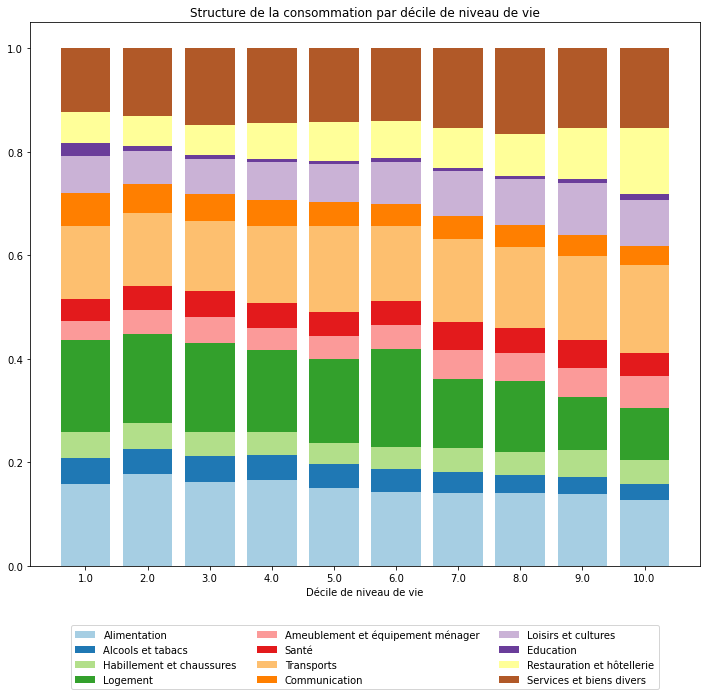

In [28]:
stacked_bar_plot(to_graph, 
                 variables = ["Part poste 0{}".format(i) for i in range(1, 10)] + ["Part poste {}".format(i) for i in range(10, 13)],
                 labels = label_postes_agreges,
                 title = 'Structure de la consommation par décile de niveau de vie',
                 xlabel = 'Décile de niveau de vie' ,
                 ylabel = '',
                 colors = list(sns.color_palette("Paired")))

In [29]:
to_graph[['poste_04_1_1_1',
 'poste_04_1_2_1',
 'loyer_impute',
 'poste_04_3_1_1',
 'poste_04_3_2_1',
 'poste_04_4_1_1',
 'poste_04_4_2_1',
 'poste_04_4_3_1',
 'poste_04_4_4_1',
 'poste_04_5_0_0',
 'poste_04_5_1_1',
 'poste_04_5_2_1',
 'poste_04_5_2_2',
 'poste_04_5_3_1',
 'poste_04_5_4_1',
 'poste_04_5_5_1',
 'poste_04_5_5_2',
 'poste_04_6_1_1', 
 'depenses_tot']]

,poste_04_1_1_1,poste_04_1_2_1,loyer_impute,poste_04_3_1_1,poste_04_3_2_1,poste_04_4_1_1,poste_04_4_2_1,poste_04_4_3_1,poste_04_4_4_1,poste_04_5_0_0,poste_04_5_1_1,poste_04_5_2_1,poste_04_5_2_2,poste_04_5_3_1,poste_04_5_4_1,poste_04_5_5_1,poste_04_5_5_2,poste_04_6_1_1,depenses_tot
niveau_vie_decile,,,,,,,,,,,,,,,,,,,
1.0,1907.937079,16.728339,3568.381437,28.920145,320.558837,109.632986,35.317884,0.0,174.211737,0.0,748.821318,240.468909,40.067364,72.433489,54.428752,53.613426,0.000000,0.0,21426.338557
2.0,1950.465484,12.693858,3653.295564,40.462233,96.679934,130.983522,342.044849,0.0,191.000594,0.0,787.313254,293.149621,48.909271,99.475437,73.551009,27.536447,0.000000,0.0,23894.268637
3.0,2159.462762,10.108496,4336.550635,45.548174,275.582831,134.563086,263.041454,0.0,168.796585,0.0,804.450904,323.802879,61.912705,97.988729,86.285028,23.589282,0.000000,0.0,25748.476216
4.0,2197.179932,23.289489,5280.474352,64.266287,102.320054,147.339079,213.331365,0.0,153.728166,0.0,864.879421,327.279199,59.539329,135.033468,86.226738,217.165739,18.544286,0.0,29196.376843
5.0,2203.446030,20.949455,5747.687996,76.957131,957.457010,150.803288,55.593569,0.0,136.583090,0.0,879.556499,320.735680,57.118193,119.504298,97.200907,0.000000,17.984981,0.0,31542.820400
6.0,2150.324103,24.633456,6585.720201,71.820299,2599.230955,163.878302,23.957663,0.0,168.021964,0.0,937.064753,331.608857,48.329083,112.793320,99.517380,44.347191,17.246770,0.0,36029.864614
7.0,1954.227856,44.989647,7262.610366,206.448839,731.108669,161.119869,135.219853,0.0,151.820355,0.0,992.581975,378.725528,49.067604,110.006070,98.679010,0.000000,36.749768,0.0,37516.550538
8.0,1969.173079,26.256398,8158.808756,94.538358,1392.984727,171.574635,297.104017,0.0,173.724527,0.0,989.338783,362.383509,52.201572,121.619960,91.298057,92.685536,22.153642,0.0,42793.082280
9.0,1823.483854,38.618799,9473.473873,110.227168,465.367370,177.282944,55.315292,0.0,196.761419,0.0,1090.857344,425.411742,36.911233,87.996634,98.207916,53.099599,0.000000,0.0,45639.467491


In [30]:
to_graph['loyers'] = to_graph['poste_04_1_1_1'] + to_graph['poste_04_1_2_1'] + to_graph['loyer_impute']
to_graph['part loyer'] = to_graph['loyers'] / to_graph['depenses_tot']
to_graph[['loyers', 'depenses_tot', 'part loyer']]

,loyers,depenses_tot,part loyer
niveau_vie_decile,,,
1.0,5493.046855,21426.338557,0.256369
2.0,5616.454906,23894.268637,0.235054
3.0,6506.121894,25748.476216,0.252680
4.0,7500.943773,29196.376843,0.256914
5.0,7972.083480,31542.820400,0.252738
6.0,8760.677759,36029.864614,0.243150
7.0,9261.827868,37516.550538,0.246873
8.0,10154.238233,42793.082280,0.237287
9.0,11335.576525,45639.467491,0.248372


### Structure de la consommation par taux de TVA 

In [31]:
to_graph[['depenses_tva_taux_plein' , 'depenses_tva_taux_intermediaire', 'depenses_tva_taux_reduit','depenses_tva_taux_super_reduit','depenses_tva_exonere','depenses_tot']]

,depenses_tva_taux_plein,depenses_tva_taux_intermediaire,depenses_tva_taux_reduit,depenses_tva_taux_super_reduit,depenses_tva_exonere,depenses_tot
niveau_vie_decile,,,,,,
1.0,9859.342310,2225.232318,4332.357656,213.106678,4796.299523,21426.338557
2.0,11188.225191,2294.436533,5127.350642,355.685947,4928.570290,23894.268637
3.0,12263.470045,2448.861504,5079.145842,329.502806,5627.496048,25748.476216
4.0,13694.425498,2787.236322,6041.011018,411.037020,6262.667022,29196.376843
5.0,14855.247887,3966.800102,6045.698705,471.302380,6203.771397,31542.820400
6.0,16352.422170,5905.026519,6666.411834,510.616813,6595.387251,36029.864614
7.0,17986.941949,4802.424695,7312.913483,480.795612,6933.474800,37516.550538
8.0,20584.640048,6103.604211,8486.950561,585.533653,7032.353711,42793.082280
9.0,22058.910418,6683.585961,8921.957778,762.031701,7212.981523,45639.467491


In [32]:
to_graph.loc[:,'Part TVA exonere'] = to_graph['depenses_tva_exonere'] / to_graph['depenses_tot']
to_graph.loc[:,'Part TVA taux super réduit'] = to_graph['depenses_tva_taux_super_reduit'] / to_graph['depenses_tot']
to_graph.loc[:,'Part TVA taux réduit'] = to_graph['depenses_tva_taux_reduit'] / to_graph['depenses_tot']
to_graph.loc[:,'Part TVA taux intermédiaire'] = to_graph['depenses_tva_taux_intermediaire'] / to_graph['depenses_tot']
to_graph.loc[:,'Part TVA taux plein'] = to_graph['depenses_tva_taux_plein'] / to_graph['depenses_tot']

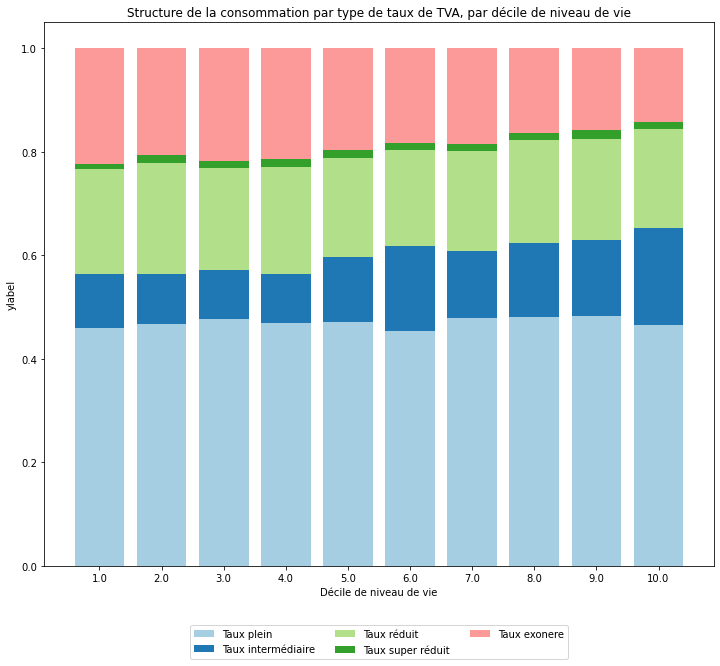

In [33]:
stacked_bar_plot(to_graph, 
                 variables = ['Part TVA taux plein','Part TVA taux intermédiaire','Part TVA taux réduit','Part TVA taux super réduit','Part TVA exonere'],
                 labels = ['Taux plein','Taux intermédiaire','Taux réduit','Taux super réduit','Taux exonere'],
                 title = 'Structure de la consommation par type de taux de TVA, par décile de niveau de vie',
                 xlabel = 'Décile de niveau de vie' ,
                 ylabel ='ylabel',
                 colors = list(sns.color_palette("Paired")))

In [34]:
to_graph.loc[:,'Part TVA taux super réduit'] = to_graph['depenses_tva_taux_super_reduit'] / to_graph['depenses_totales']
to_graph.loc[:,'Part TVA taux réduit'] = to_graph['depenses_tva_taux_reduit'] / to_graph['depenses_totales']
to_graph.loc[:,'Part TVA taux intermédiaire'] = to_graph['depenses_tva_taux_intermediaire'] / to_graph['depenses_totales']
to_graph.loc[:,'Part TVA taux plein'] = to_graph['depenses_tva_taux_plein'] / to_graph['depenses_totales']

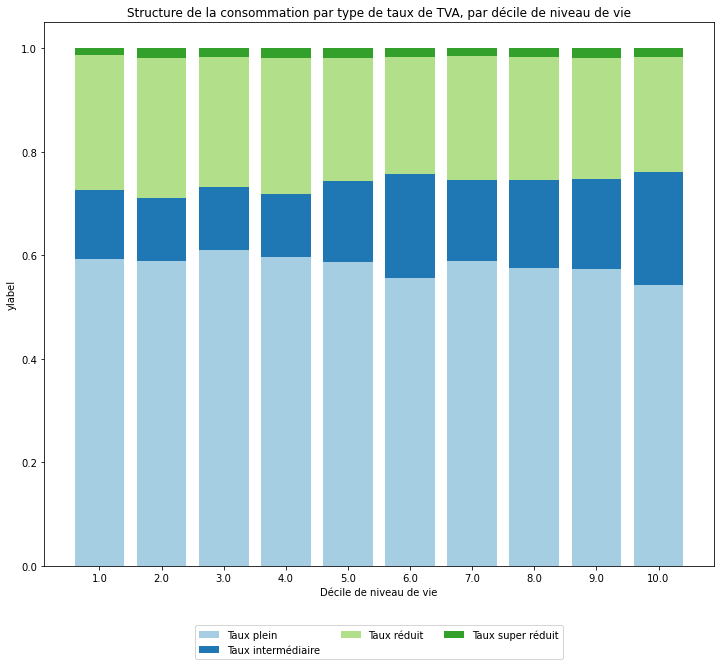

In [35]:
stacked_bar_plot(to_graph, 
                 variables = ['Part TVA taux plein','Part TVA taux intermédiaire','Part TVA taux réduit','Part TVA taux super réduit'],
                 labels = ['Taux plein','Taux intermédiaire','Taux réduit','Taux super réduit'],
                 title = 'Structure de la consommation par type de taux de TVA, par décile de niveau de vie',
                 xlabel = 'Décile de niveau de vie' ,
                 ylabel ='ylabel',
                 colors = list(sns.color_palette("Paired")))

In [36]:
total_graph = pd.DataFrame(to_graph[['depenses_tva_taux_plein' , 'depenses_tva_taux_intermediaire', 
          'depenses_tva_taux_reduit','depenses_tva_taux_super_reduit',
          'depenses_tva_exonere','depenses_tot', 'depenses_totales']].mean()).T

In [37]:
total_graph.loc[:,'Part TVA exonere'] = total_graph['depenses_tva_exonere'] / total_graph['depenses_tot']
total_graph.loc[:,'Part TVA taux super réduit'] = total_graph['depenses_tva_taux_super_reduit'] / total_graph['depenses_tot']
total_graph.loc[:,'Part TVA taux réduit'] = total_graph['depenses_tva_taux_reduit'] / total_graph['depenses_tot']
total_graph.loc[:,'Part TVA taux intermédiaire'] = total_graph['depenses_tva_taux_intermediaire'] / total_graph['depenses_tot']
total_graph.loc[:,'Part TVA taux plein'] = total_graph['depenses_tva_taux_plein'] / total_graph['depenses_tot']

In [38]:
total_graph[['Part TVA exonere','Part TVA taux super réduit','Part TVA taux réduit','Part TVA taux intermédiaire','Part TVA taux plein']]

,Part TVA exonere,Part TVA taux super réduit,Part TVA taux réduit,Part TVA taux intermédiaire,Part TVA taux plein
0,0.181402,0.014068,0.196441,0.136773,0.471316


In [39]:
total_graph.loc[:,'Part TVA taux super réduit'] = total_graph['depenses_tva_taux_super_reduit'] / total_graph['depenses_totales']
total_graph.loc[:,'Part TVA taux réduit'] = total_graph['depenses_tva_taux_reduit'] / total_graph['depenses_totales']
total_graph.loc[:,'Part TVA taux intermédiaire'] = total_graph['depenses_tva_taux_intermediaire'] / total_graph['depenses_totales']
total_graph.loc[:,'Part TVA taux plein'] = total_graph['depenses_tva_taux_plein'] / total_graph['depenses_totales']

In [40]:
total_graph[['Part TVA taux super réduit','Part TVA taux réduit','Part TVA taux intermédiaire','Part TVA taux plein']]

,Part TVA taux super réduit,Part TVA taux réduit,Part TVA taux intermédiaire,Part TVA taux plein
0,0.017186,0.239972,0.167082,0.57576


## Réforme TVA

In [56]:
from openfisca_france_indirect_taxation.projects.TVA_Herve_IPP.Reform_TVA_budget_2025 import (augmente_taux_plein, 
                                                                                              augmente_taux_intermediaire,
                                                                                              augmente_taux_reduit,
                                                                                              augmente_taux_super_reduit)

In [57]:
simulated_variables = ['depenses_tva_taux_plein',
'depenses_tva_taux_intermediaire',
'depenses_tva_taux_reduit',
'depenses_tva_taux_super_reduit',
'depenses_tva_exonere',
'depenses_totales',
'loyer_impute',
'depenses_ht_tva_taux_plein',
'tva_taux_plein',
 'tva_taux_intermediaire',
 'tva_taux_reduit',
 'tva_taux_super_reduit',
 'tva_total',
 'niveau_de_vie',
 'rev_disponible',
 'decile_rev_disponible',
 'rev_disp_yc_loyerimpute',
 'depenses_tot',
 'pondmen']

In [58]:
year = 2024
data_year = 2017
inflators_by_year = new_get_inflators_by_year(rebuild = False, year_range = range(2017, 2025), data_year = data_year)
tax_benefit_system = FranceIndirectTaxationTaxBenefitSystem()
inflation_kwargs = dict(inflator_by_variable = inflators_by_year[year])

In [59]:
survey_scenario = SurveyScenario.create(
    inflation_kwargs =  inflation_kwargs,
    baseline_tax_benefit_system = tax_benefit_system,
    reform = augmente_taux_plein,
    year = year,
    data_year = data_year
    )

rev_disponible_2024 = dataframe_by_group(survey_scenario, category = 'niveau_vie_decile', use_baseline= True, variables = simulated_variables, aggfunc = 'mean')
reforme_taux_plein = dataframe_by_group(survey_scenario, category = 'niveau_vie_decile', difference = True, variables = simulated_variables, aggfunc = 'mean')

In [60]:
reforme_taux_plein

,depenses_tva_taux_plein,depenses_tva_taux_intermediaire,depenses_tva_taux_reduit,depenses_tva_taux_super_reduit,depenses_tva_exonere,depenses_totales,loyer_impute,depenses_ht_tva_taux_plein,tva_taux_plein,tva_taux_intermediaire,tva_taux_reduit,tva_taux_super_reduit,tva_total,niveau_de_vie,rev_disponible,decile_rev_disponible,rev_disp_yc_loyerimpute,depenses_tot,pondmen
niveau_vie_decile,,,,,,,,,,,,,,,,,,,
1,93.192939,0.0,0.0,0.0,-93.192944,93.192925,0.0,0.0,93.192966,0.0,0.0,0.0,93.192968,0.0,0.0,0.0,0.0,0.0,NaN
2,106.416754,0.0,0.0,0.0,-106.416750,106.416804,0.0,0.0,106.416758,0.0,0.0,0.0,106.416753,0.0,0.0,0.0,0.0,0.0,NaN
3,116.863638,0.0,0.0,0.0,-116.863607,116.863626,0.0,0.0,116.863650,0.0,0.0,0.0,116.863647,0.0,0.0,0.0,0.0,0.0,NaN
4,131.958662,0.0,0.0,0.0,-131.958624,131.958643,0.0,0.0,131.958661,0.0,0.0,0.0,131.958667,0.0,0.0,0.0,0.0,0.0,NaN
5,143.379049,0.0,0.0,0.0,-143.379040,143.379092,0.0,0.0,143.379041,0.0,0.0,0.0,143.379043,0.0,0.0,0.0,0.0,0.0,NaN
6,157.266266,0.0,0.0,0.0,-157.266209,157.266152,0.0,0.0,157.266261,0.0,0.0,0.0,157.266273,0.0,0.0,0.0,0.0,0.0,NaN
7,174.276434,0.0,0.0,0.0,-174.276411,174.276413,0.0,0.0,174.276432,0.0,0.0,0.0,174.276427,0.0,0.0,0.0,0.0,0.0,NaN
8,200.807405,0.0,0.0,0.0,-200.807431,200.807379,0.0,0.0,200.807446,0.0,0.0,0.0,200.807438,0.0,0.0,0.0,0.0,0.0,NaN
9,216.144767,0.0,0.0,0.0,-216.144691,216.144722,0.0,0.0,216.144721,0.0,0.0,0.0,216.144727,0.0,0.0,0.0,0.0,0.0,NaN


In [61]:
recolte_taux_plein = survey_scenario.compute_aggregate(variable='tva_taux_plein',difference= True, period = year) * 1e-9
recolte_taux_plein

4.595400864896058

In [62]:
survey_scenario = SurveyScenario.create(
    inflation_kwargs =  inflation_kwargs,
    baseline_tax_benefit_system = tax_benefit_system,
    reform = augmente_taux_intermediaire,
    year = year,
    data_year = data_year
    )

reforme_taux_intermediaire = dataframe_by_group(survey_scenario, category = 'niveau_vie_decile', difference = True, variables = simulated_variables, aggfunc = 'mean')

In [63]:
reforme_taux_intermediaire

,depenses_tva_taux_plein,depenses_tva_taux_intermediaire,depenses_tva_taux_reduit,depenses_tva_taux_super_reduit,depenses_tva_exonere,depenses_totales,loyer_impute,depenses_ht_tva_taux_plein,tva_taux_plein,tva_taux_intermediaire,tva_taux_reduit,tva_taux_super_reduit,tva_total,niveau_de_vie,rev_disponible,decile_rev_disponible,rev_disp_yc_loyerimpute,depenses_tot,pondmen
niveau_vie_decile,,,,,,,,,,,,,,,,,,,
1.0,0.0,29.193024,0.0,0.0,-29.193056,29.192977,0.0,0.0,0.0,29.193041,0.0,0.0,29.193042,0.0,0.0,0.0,0.0,0.0,NaN
2.0,0.0,29.954852,0.0,0.0,-29.954780,29.954824,0.0,0.0,0.0,29.954863,0.0,0.0,29.954857,0.0,0.0,0.0,0.0,0.0,NaN
3.0,0.0,32.300747,0.0,0.0,-32.300786,32.300737,0.0,0.0,0.0,32.300765,0.0,0.0,32.300772,0.0,0.0,0.0,0.0,0.0,NaN
4.0,0.0,37.402762,0.0,0.0,-37.402678,37.402712,0.0,0.0,0.0,37.402788,0.0,0.0,37.402784,0.0,0.0,0.0,0.0,0.0,NaN
5.0,0.0,52.906350,0.0,0.0,-52.906419,52.906387,0.0,0.0,0.0,52.906387,0.0,0.0,52.906380,0.0,0.0,0.0,0.0,0.0,NaN
6.0,0.0,77.868306,0.0,0.0,-77.868271,77.868291,0.0,0.0,0.0,77.868397,0.0,0.0,77.868402,0.0,0.0,0.0,0.0,0.0,NaN
7.0,0.0,63.672495,0.0,0.0,-63.672455,63.672440,0.0,0.0,0.0,63.672541,0.0,0.0,63.672539,0.0,0.0,0.0,0.0,0.0,NaN
8.0,0.0,80.841443,0.0,0.0,-80.841628,80.841384,0.0,0.0,0.0,80.841523,0.0,0.0,80.841531,0.0,0.0,0.0,0.0,0.0,NaN
9.0,0.0,89.917718,0.0,0.0,-89.917684,89.917608,0.0,0.0,0.0,89.917746,0.0,0.0,89.917750,0.0,0.0,0.0,0.0,0.0,NaN


In [64]:
recolte_taux_inter = survey_scenario.compute_aggregate(variable='tva_taux_intermediaire',difference= True, period = year) * 1e-9
recolte_taux_inter

1.8341038378564989

In [65]:
survey_scenario = SurveyScenario.create(
    inflation_kwargs =  inflation_kwargs,
    baseline_tax_benefit_system = tax_benefit_system,
    reform = augmente_taux_reduit,
    year = year,
    data_year = data_year
    )

reforme_taux_reduit = dataframe_by_group(survey_scenario, category = 'niveau_vie_decile', difference = True, variables = simulated_variables, aggfunc = 'mean')

In [66]:
recolte_taux_reduit = survey_scenario.compute_aggregate(variable='tva_taux_reduit',difference= True, period = year) * 1e-9
recolte_taux_reduit

2.3754768138167877

In [67]:
tax_benefit_system = FranceIndirectTaxationTaxBenefitSystem()
inflation_kwargs = dict(inflator_by_variable = inflators_by_year[year])

survey_scenario = SurveyScenario.create(
    inflation_kwargs =  inflation_kwargs,
    baseline_tax_benefit_system = tax_benefit_system,
    reform = augmente_taux_super_reduit,
    year = year,
    data_year = data_year
    )
reforme_taux_super_reduit = dataframe_by_group(survey_scenario, category = 'niveau_vie_decile', difference = True, variables = simulated_variables, aggfunc = 'mean')

In [68]:
recolte_taux_super_reduit = survey_scenario.compute_aggregate(variable='tva_taux_super_reduit',difference= True, period = year) * 1e-9
recolte_taux_super_reduit

0.15246641363397187

In [69]:
recolte_taux_plein + recolte_taux_inter + recolte_taux_reduit + recolte_taux_super_reduit

8.957447930203315

In [70]:
dfs = [rev_disponible_2024, reforme_taux_plein, reforme_taux_intermediaire, reforme_taux_reduit, reforme_taux_super_reduit]
cols = ['rev_disponible','depenses_tva_taux_plein', 'depenses_tva_taux_intermediaire', 'depenses_tva_taux_reduit', 'depenses_tva_taux_super_reduit']

all_reforms = pd.DataFrame(index = rev_disponible_2024.index)

In [71]:
for df, col in zip(dfs,cols):
    all_reforms[col] = df[col]

In [72]:
all_reforms

,rev_disponible,depenses_tva_taux_plein,depenses_tva_taux_intermediaire,depenses_tva_taux_reduit,depenses_tva_taux_super_reduit
niveau_vie_decile,,,,,
1.0,19562.215712,93.192939,29.193024,52.594015,2.350097
2.0,30570.456899,106.416754,29.954852,61.931476,3.837130
3.0,35888.229291,116.863638,32.300747,60.988823,3.498886
4.0,41908.308406,131.958662,37.402762,72.694857,4.357793
5.0,46751.191709,143.379049,52.906350,72.533549,5.011747
6.0,52798.821900,157.266266,77.868306,79.792347,5.482673
7.0,60392.851562,174.276434,63.672495,87.400895,5.134584
8.0,68603.892981,200.807405,80.841443,101.214847,6.321710
9.0,81485.981458,216.144767,89.917718,106.756377,8.342460


In [73]:
liste_taux = ['taux_plein', 'taux_intermediaire', 'taux_reduit', 'taux_super_reduit']
for taux in liste_taux:
   all_reforms['Taux_effort_tva_{}'.format(taux)] = all_reforms['depenses_tva_{}'.format(taux)] / all_reforms['rev_disponible'] * 100

In [74]:
all_reforms

,rev_disponible,depenses_tva_taux_plein,depenses_tva_taux_intermediaire,depenses_tva_taux_reduit,depenses_tva_taux_super_reduit,Taux_effort_tva_taux_plein,Taux_effort_tva_taux_intermediaire,Taux_effort_tva_taux_reduit,Taux_effort_tva_taux_super_reduit
niveau_vie_decile,,,,,,,,,
1.0,19562.215712,93.192939,29.193024,52.594015,2.350097,0.476393,0.149232,0.268855,0.012013
2.0,30570.456899,106.416754,29.954852,61.931476,3.837130,0.348103,0.097986,0.202586,0.012552
3.0,35888.229291,116.863638,32.300747,60.988823,3.498886,0.325632,0.090004,0.169941,0.009749
4.0,41908.308406,131.958662,37.402762,72.694857,4.357793,0.314875,0.089249,0.173462,0.010398
5.0,46751.191709,143.379049,52.906350,72.533549,5.011747,0.306685,0.113166,0.155148,0.010720
6.0,52798.821900,157.266266,77.868306,79.792347,5.482673,0.297859,0.147481,0.151125,0.010384
7.0,60392.851562,174.276434,63.672495,87.400895,5.134584,0.288571,0.105431,0.144721,0.008502
8.0,68603.892981,200.807405,80.841443,101.214847,6.321710,0.292706,0.117838,0.147535,0.009215
9.0,81485.981458,216.144767,89.917718,106.756377,8.342460,0.265254,0.110347,0.131012,0.010238


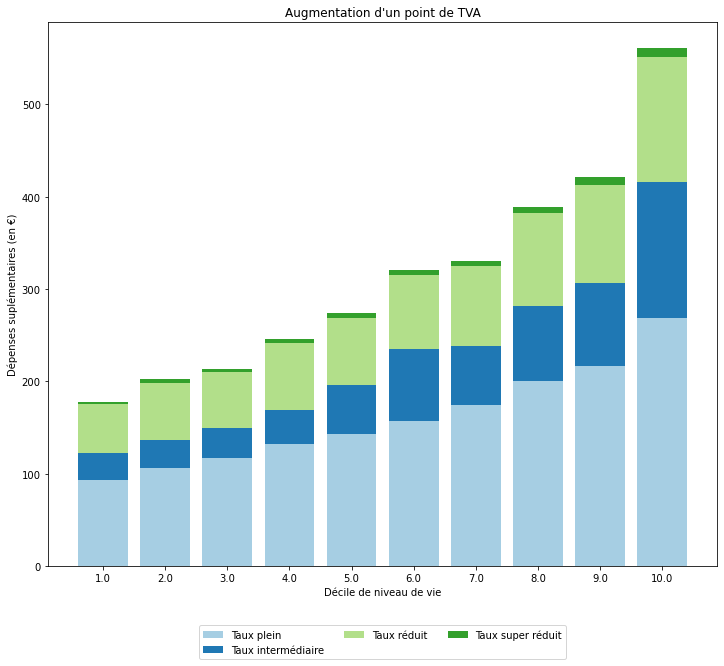

In [75]:
stacked_bar_plot(all_reforms, 
                 variables = ['depenses_tva_{}'.format(taux) for taux in liste_taux],
                 labels = ['Taux plein','Taux intermédiaire','Taux réduit','Taux super réduit'],
                 title = 'Augmentation d\'un point de TVA',
                 xlabel = 'Décile de niveau de vie' ,
                 ylabel ='Dépenses suplémentaires (en €)',
                 colors = list(sns.color_palette("Paired")))

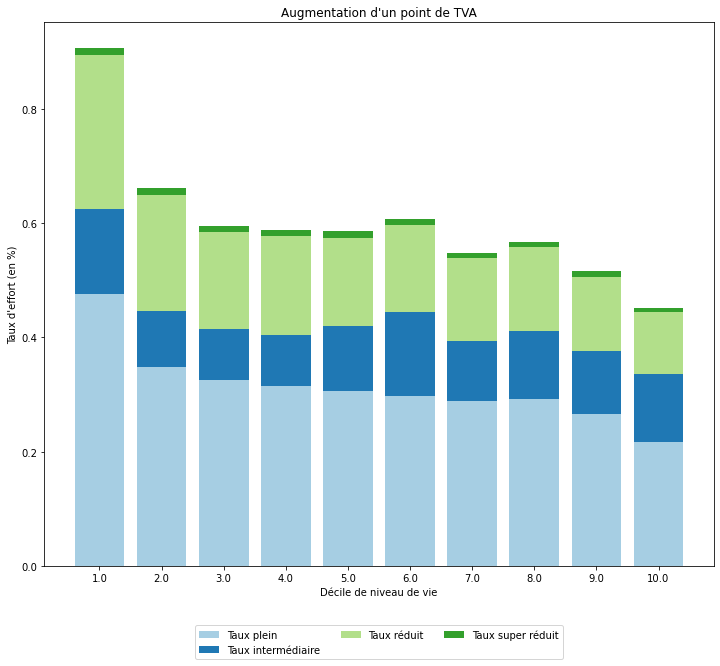

In [76]:
stacked_bar_plot(all_reforms, 
                 variables = ['Taux_effort_tva_{}'.format(taux) for taux in liste_taux],
                 labels = ['Taux plein','Taux intermédiaire','Taux réduit','Taux super réduit'],
                 title = 'Augmentation d\'un point de TVA',
                 xlabel = 'Décile de niveau de vie' ,
                 ylabel ='Taux d\'effort (en %)',
                 colors = list(sns.color_palette("Paired")))